### Desafio Ciências de Dados - LightHouse

Neste notebook irei desenvolver um modelo de previsão de preços a partir do dataset oferecido pelo programa LightHouse, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema.

In [2]:
# Instalando a biblioteca panda
import pandas as pd

# Importando os dados do dataset para iniciar a Análise Exploratória dos dados
Tab_Prec = pd.read_csv(r'C:\Users\fabii\Desktop\ciencias de dados\teste_indicium_precificacao.csv')

# Visualizando o dataset
Tab_Prec

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


#### Análise exploratória dos dados 

Examinando visualmente o conjunto de dados observei a presença de imóveis com avaliação igual a zero, assim como imóveis com disponibilidade ao longo do ano também igual a zero. A fim de trabalhar com dados que possam proporcionar valor, dado que o dataset possui quase 50 mil linhas, irei realizar uma limpeza nos dados a fim de:

- Remover as linhas em que a disponibilidade ao longo do ano é igual a zero, isso se justifica, pois esse grupo não está disponível para locação. 
- Remover as linhas em que o número de reviews é igual a zero, considerarei que apenas os imóveis com avaliações foram alugados e geraram valor à plataforma e aos seus proprietários.

In [3]:
#declarando as variáveis
coluna_alvo = 'disponibilidade_365'

#Limpando a coluna de disponibilidade de ano
Tab_Prec = Tab_Prec[Tab_Prec[coluna_alvo] !=0 ]

# Visualizando o dataset
Tab_Prec


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
#declarando as variáveis
coluna_alvo = 'numero_de_reviews'

#Limpando a coluna de reviews
Tab_Prec = Tab_Prec[Tab_Prec[coluna_alvo] !=0 ]

# Visualizando o dataset
Tab_Prec


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48781,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48789,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48798,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48804,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


Após executar a limpeza, tivemos um resultado de 26.153 imóveis, o que representa 53.44% de nossa base de dados. 

#### Análises para o item 2

- Abaixo, organizarei nossa base de dados com base no número de avaliações, ordenando-as do maior para o menor. Meu objetivo ao realizar essa ordenação é avaliar os preços, localização e tipo dos imóveis mais alugados.

In [6]:
#declarando as variáveis
coluna_alvo = 'numero_de_reviews'

#ordenando a coluna numero de reviews por ordem descrecente
Tab_Prec_Ord = Tab_Prec.sort_values(by=coluna_alvo, ascending=False)

# Visualizando o dataset
Tab_Prec_Ord



,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
11758,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2030,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2029,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2014,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13494,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44250,34126627,Woodside condo room close to Midtown / LGA.,137358866,Kazuya,Queens,Woodside,40.74165,-73.90155,Private room,59,30,1,2019-06-15,1.00,103,260
44251,34126672,ZEN LIVING RM CLOSE 2 COLUMBIA UNI & CENTRAL PRK!,161061302,Carol,Manhattan,Upper West Side,40.80244,-73.96592,Shared room,50,1,1,2019-05-08,0.48,2,363
38213,30141411,Renewed private cozy room next to the Central ...,126653377,Sergii,Manhattan,Harlem,40.80348,-73.95775,Private room,50,30,1,2019-01-16,0.17,6,304
44264,34143280,Clean & Cozy Guestroom in Harlem-Heights,42767903,Shara,Manhattan,Washington Heights,40.83248,-73.94177,Private room,50,3,1,2019-06-21,1.00,1,14


#### Trabalhando com uma amostra P1

Abaixo, vou selecionar uma amostra de aproximadamente 10% da nossa base de dados atual. 
Nesta amostra, serão incluídos os 250 imóveis com mais avaliações. 
Utilizando essa amostra, pretendo avaliar a densidade de imóveis por bairro, o que me permitirá identificar o bairro mais indicado para investir em imóveis para alugar.

In [7]:
# declarando as colunas
colunas_desejadas = ['numero_de_reviews' , 'price', 'bairro_group', 'bairro', 'room_type', 'nome', 'minimo_noites', 'disponibilidade_365' ]

# chamando somente as colunas que são mportantes nesta análise
Tab_Prec_ordenado = Tab_Prec_Ord[colunas_desejadas]

# Visualizando o dataset
Tab_Prec_ordenado.head(250)

,numero_de_reviews,price,bairro_group,bairro,room_type,nome,minimo_noites,disponibilidade_365
11758,629,47,Queens,Jamaica,Private room,Room near JFK Queen Bed,1,333
2030,607,49,Manhattan,Harlem,Private room,Great Bedroom in Manhattan,1,293
2029,597,49,Manhattan,Harlem,Private room,Beautiful Bedroom in Manhattan,1,342
2014,594,49,Manhattan,Harlem,Private room,Private Bedroom in Manhattan,1,339
13494,576,47,Queens,Jamaica,Private room,Room Near JFK Twin Beds,1,173
...,...,...,...,...,...,...,...,...
4089,254,80,Manhattan,Upper West Side,Private room,Cozy Private Room Upper West Side - with Deck!,1,118
11161,254,77,Queens,Astoria,Private room,NYC suite w/ Bath & Balcony near LGA JFK Manha...,1,11
208,253,140,Brooklyn,Williamsburg,Entire home/apt,Private Garden Apt • New Renovation,2,125
3748,252,221,Manhattan,Chelsea,Entire home/apt,New Studio in Heart of Chelsea,2,256


Agora irei aplicar a função que nos retorne, dentro dessa amostra, quantas vezes cada bairro aparece em nossa base de dados, assim saberemos qual bairro é sugestivo investir.

Número por região
bairro_group
Manhattan        103
Brooklyn          85
Queens            55
Bronx              6
Staten Island      1
Name: count, dtype: int64

Porcentagem por região
bairro_group
Manhattan        41.2
Brooklyn         34.0
Queens           22.0
Bronx             2.4
Staten Island     0.4
Name: count, dtype: float64


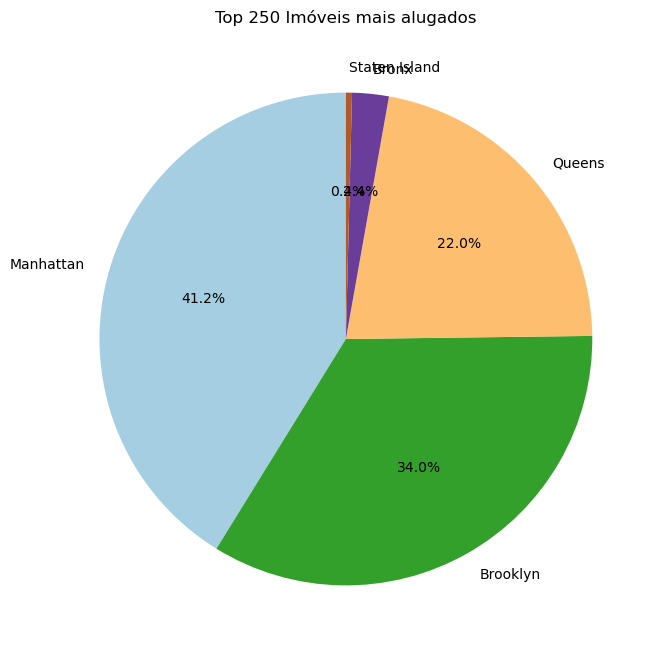

In [89]:
# declarando variáveis
regiao = 'bairro_group'

# Contado a quantidade de imóveis por região
contagem = Tab_Prec_ordenado.head(250)[regiao].value_counts()

# Calculado a porcentagem de imóveis por região
porcentagem_valores = (contagem / len(Tab_Prec_ordenado.head(250)[bairro])) * 100

# mostrando resultados
print('Número por região')
print(contagem)
print('\nPorcentagem por região')
print(porcentagem_valores )

# Mostrando os dados de forma visual
#importando a biblioteca
import matplotlib.pyplot as plt

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
porcentagem_valores.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Paired')
plt.title('Top 250 Imóveis mais alugados')
plt.ylabel('')  
plt.show()

Contagem por bairro em Manhattan:
bairro
Harlem                19
East Village          16
Hell's Kitchen        13
Upper West Side       11
Lower East Side       11
East Harlem           10
Washington Heights     4
Chelsea                4
Upper East Side        3
West Village           2
Midtown                1
Kips Bay               1
Financial District     1
Gramercy               1
Chinatown              1
Civic Center           1
Murray Hill            1
Theater District       1
Tribeca                1
Inwood                 1
Name: count, dtype: int64

Porcentagem por bairro em Manhattan:
bairro
Harlem                18.446602
East Village          15.533981
Hell's Kitchen        12.621359
Upper West Side       10.679612
Lower East Side       10.679612
East Harlem            9.708738
Washington Heights     3.883495
Chelsea                3.883495
Upper East Side        2.912621
West Village           1.941748
Midtown                0.970874
Kips Bay               0.970874
Fina

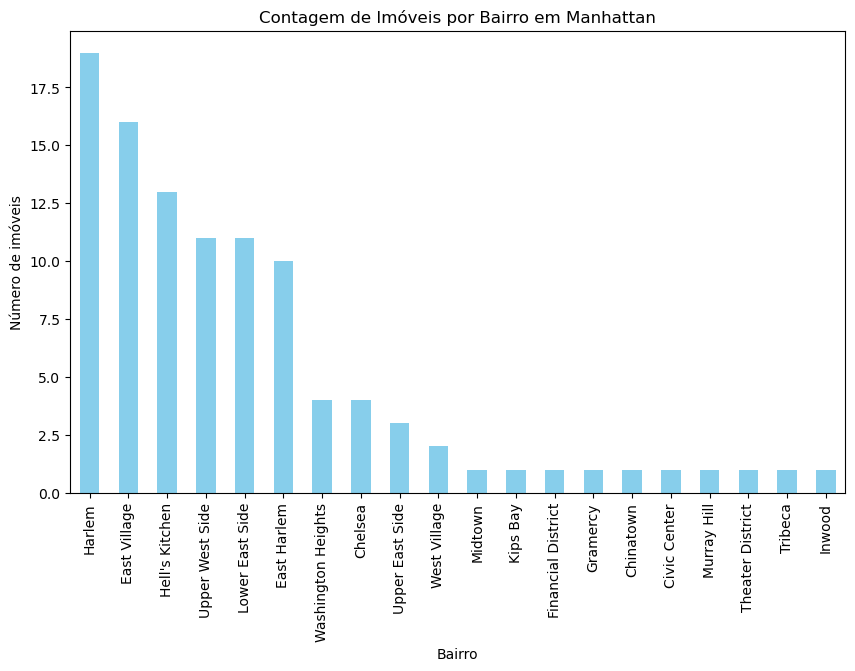

In [90]:
regiao = 'bairro_group'
bairro = 'bairro'

# Filtrando apenas os imóveis da região de Manhattan
manhattan_data = Tab_Prec_ordenado.head(250)[Tab_Prec_ordenado.head(250)[regiao] == 'Manhattan']

# Calculando contagem e porcentagem para os bairros de Manhattan
contagem_manhattan = manhattan_data['bairro'].value_counts()
porcentagem_manhattan = (contagem_manhattan / len(manhattan_data)) * 100

# Exibindo os resultados
print("Contagem por bairro em Manhattan:")
print(contagem_manhattan)
print("\nPorcentagem por bairro em Manhattan:")
print(porcentagem_manhattan)


# Mostrando os dados de forma visual
#Criando gráfico de colunas
plt.figure(figsize=(10, 6))
contagem_manhattan.plot(kind='bar', color='skyblue')
plt.title('Contagem de Imóveis por Bairro em Manhattan')
plt.xlabel('Bairro')
plt.ylabel('Número de imóveis')
plt.show()

Dado a nossa amostra de 260 imóveis mais alugados na plataforma:
- A região onde se tem imóveis é Manhattan com 41,2%, 
- O bairro de Manhattan com mais locações é o Harlem com 18,44%.

##### Dado esta análise o melhor lugar para investir em um imóvel para alugar é no bairro Harlem.

#### Trabalhando com uma amostra P2


Abaixo selecionei uma amostra dos 99 imóveis mais caros para que eu possa responder se:
- O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?
- Existe algum padrão no texto do nome do local para lugares de mais alto valor?


In [96]:
#declarando as variáveis
coluna_alvo = 'price'

# declarando as colunas
colunas_desejadas = ['price', 'nome', 'minimo_noites', 'disponibilidade_365' ]

# chamando somente as colunas que são importantes nesta análise
Tab_Prec = Tab_Prec[colunas_desejadas]
Tab_Prec_min = Tab_Prec.sort_values(by=coluna_alvo, ascending=False)

# Visualizando o dataset
Tab_Prec_min.head(99)


,price,nome,minimo_noites,disponibilidade_365
12341,9999,"Quiet, Clean, Lit @ LES & Chinatown",99,83
30267,8500,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,30,251
4376,8000,Film Location,1,365
45665,7500,Gem of east Flatbush,1,179
3536,6000,UWS 1BR w/backyard + block from CP,14,359
...,...,...,...,...
35919,1000,NYC Townhouse & Private Roof Deck,4,66
23693,1000,NYC Hotel (Enjoy top tier membership benefits),1,90
2214,1000,Tribeca Loft w/ Private Elevator,1,37
27784,1000,Exclusive & Luxurious 4BR/4Bath Townhouse,3,310


Dados a análise multivariada realizada, não encontro relação entre as informações de noites para alugar x preço da diária ou disponibilidade ao ano x preço da diária. 

Abaixo, irei avaliar se existe algum padrão no texto do nome dos imóveis de maior valor para locação. 

In [102]:
nome = 'nome'

# Contagem das palavras
palavras_contagem = Tab_Prec_min.head(99)[nome].str.lower().str.replace(r'[^a-z\s]', '', regex=True).str.split(expand=True).stack().value_counts()

# Exibindo resultado
print("Palavras que se repetem:")
print(palavras_repetidas)


Palavras que se repetem:
townhouse       21
in              20
luxury          13
private         13
loft            11
                ..
presidential     2
duplex           2
celebrity        2
by               2
spectacular      2
Name: count, Length: 83, dtype: int64


Dado a análise, as palavras que são relevantes com mais densidade dentro do grupo de amostra utilizado são:

- townhouse aparecendo 21 vezes
- Luxury aparecendo 13 vezes
- private aparecendo 13 vezes

Logo, concluo que sim, existe um padrão de palavras para imóveis de alto valor.

#### Conclusão (item 3)

Para realizar uma previsão dos preços dos imóveis através dos dados apresentados em nosso dataset eu faria uma análise utilizando
a técnica estatística de Regressão, através dos modelo de Regressão Linear.
- Prós: A regressão linear é uma abordagem que destaca-se por sua rapidez no treinamento do algoritmo, é eficaz em identificar relações entre variáveis e identificar padrões.
- Contras: Pode falhar na modelagem dos dados, se o dado não for linear, sendo assim não adequada para todo tipo de dados.
    
Para o nosso dataset eu trabalharia com as seguintes variáveis:   
- região onde está o imóvel (região macro - bairro)
- Tipo do imóvel
- o preço da diária dos concorrentes na mesma região   


#### Item 4 - Estudo de preço

Para fazer a predição do preço de um imóvel com base em nosso dataset, irei utilizar a base de dados inicial já trabalhada, criando um dataFrame com base no 'bairro' = 'Midtown', 'minimo de noite' = 1 e tipo de imóvei 'room_type' = Entire home/apt. 


Dados para cálculo do preço do imóvel:

{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

In [14]:
#declarando as colunas que serão usadas
colunas_desejadas = ['numero_de_reviews' , 'price', 'bairro', 'room_type', 'minimo_noites' , 'disponibilidade_365']

#chamando as colunas que serão usadas
Tab_Prec_filtro = Tab_Prec[colunas_desejadas]

# Visualizando o dataset
Tab_Prec_filtro

,numero_de_reviews,price,bairro,room_type,minimo_noites,disponibilidade_365
0,45,225,Midtown,Entire home/apt,1,355
2,270,89,Clinton Hill,Entire home/apt,1,194
4,74,200,Murray Hill,Entire home/apt,3,129
6,430,79,Hell's Kitchen,Private room,2,220
8,160,150,Chinatown,Entire home/apt,1,188
...,...,...,...,...,...,...
48781,1,129,Upper East Side,Private room,1,147
48789,1,45,Flushing,Private room,1,339
48798,1,235,Great Kills,Private room,1,87
48804,2,100,Mott Haven,Entire home/apt,1,40


In [13]:
# declarando as variáveis
minimo_noites = 'minimo_noites'
bairro = 'bairro'
room_type = 'room_type'

# inserindo as condições
condicao_noites = (Tab_Prec_filtro['minimo_noites'] == 1)
condicao_bairro = (Tab_Prec_filtro['bairro'] == 'Midtown')
condicao_review = (Tab_Prec_filtro['numero_de_reviews'] > 0)
condicao_tipo = (Tab_Prec_filtro['room_type'] == 'Entire home/apt')
Tab_Prec_filtro = Tab_Prec_filtro[condicao_bairro & condicao_noites & condicao_tipo & condicao_review]

# Visualizando o dataset
Tab_Prec_filtro

,numero_de_reviews,price,bairro,room_type,minimo_noites,disponibilidade_365
0,45,225,Midtown,Entire home/apt,1,355
2430,7,200,Midtown,Entire home/apt,1,358
2605,78,219,Midtown,Entire home/apt,1,301
4003,87,399,Midtown,Entire home/apt,1,267
6966,168,135,Midtown,Entire home/apt,1,287
...,...,...,...,...,...,...
47124,3,170,Midtown,Entire home/apt,1,270
47366,1,145,Midtown,Entire home/apt,1,277
47370,3,250,Midtown,Entire home/apt,1,360
47605,2,155,Midtown,Entire home/apt,1,300


Para as váriaveis do meu modelo de Regressão Linear utilizei: 

- y: Váriavel dependente: 'price'
- x: Váriavel independente: 'reviews'

Coeficiente: -0.23149800684128988
Termo Independente: 158.72722246861176
Erro Médio Quadrático: 39369.82360976454
Coeficiente de Determinação (R²): 0.004006272087109575


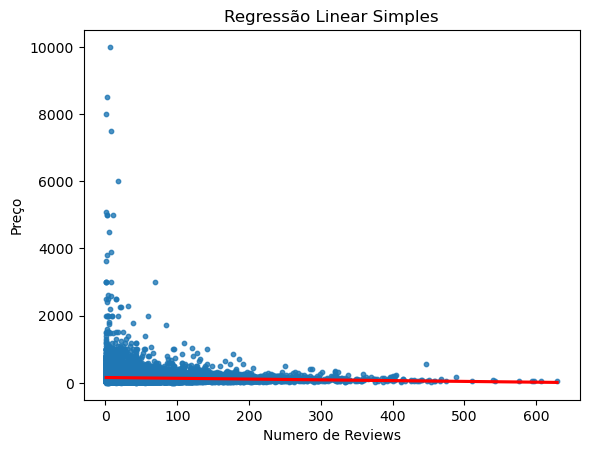

In [16]:
# importando a biblioteca
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# declarando nossas variáveis
X = Tab_Prec_filtro[['numero_de_reviews']]
y = Tab_Prec_filtro['price']

# declarando o modelo
modelo = LinearRegression()
modelo.fit(X, y)

# exibindo os coeficientes e o termo independente
print('Coeficiente:', modelo.coef_[0])
print('Termo Independente:', modelo.intercept_)

previsoes = modelo.predict(X)


# calculando o erro médio quadrático
mse = mean_squared_error(y, previsoes)
print('Erro Médio Quadrático:', mse)

# calculando o coeficiente de determinação (R²)
r2 = r2_score(y, previsoes)
print('Coeficiente de Determinação (R²):', r2)


#importando a biblioteca para o gráfico
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações do gráfico
sns.regplot(x='numero_de_reviews', y='price', data=Tab_Prec_filtro, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Numero de Reviews')
plt.ylabel('Preço')
plt.title('Regressão Linear Simples')

# Exibindo o gráfico
plt.show()



In [19]:
termo_independente = 158.72722246861176
coeficiente_reviews = -0.23149800684128988
reviews = 45

preco_previsto = termo_independente + (coeficiente_reviews * reviews)

# Exiba o resultado
print(f"O preço previsto para o imóvel é: {preco_previsto}")


O preço previsto para o imóvel é: 148.30981216075372


- Com base em minha análise demostrada acima, o preço do imóvel do exercício com base na projeção de reviews é de $148.

- O Coeficiente de Determinação (R²): 0.004006272087109575 sugere que o modelo tem um ajuste limitado aos dados, ou seja, esta variável tem pouca influencia no valor do imóvel.
    
- Já o coefieciente (coeficiente para a variável independente é -0.2315) nos mostra que a medida que o preço diminiu a quantidade de reviews aumenta, como mostra no gráfico.    



#### Fontes que utilizei para executar este projeto:

1 - Exercício e base de dados do projeto LightHouse
2 - Artigos:

- https://ebaconline.com.br/blog/analise-exploratoria-de-dados-o-que-e
- https://www.alura.com.br/artigos/conhecendo-o-jupyter-notebook
- https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet
- https://www.qualtrics.com/pt-br/gestao-de-experiencia/pesquisa-de-mercado/determine-sample-size/
- https://www.alura.com.br/artigos/desvendando-a-regressao-linear
- https://www.youtube.com/watch?v=TLlzToeIpGc
- https://www.learningdata.dev/post/entendendo-os-modelos-de-regressao
- https://www.hashtagtreinamentos.com/python-pickle-perpetuar-objetos-no-python

3 - Chat GPT